In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df=pd.read_excel('energy_production 1.xlsx')
df.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [3]:
#checking for null values
df.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


Text(0.5, 1.0, 'R Humidity')

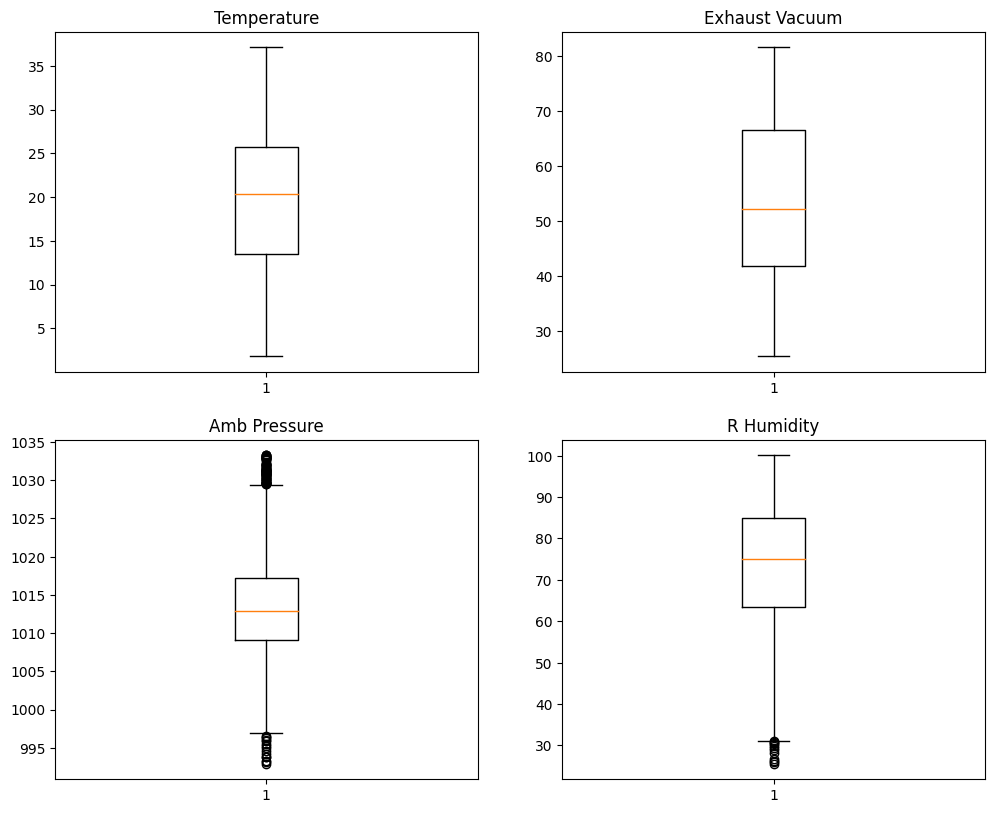

In [5]:
plt.figure(figsize=(12,15))
plt.subplot(321)
plt.boxplot(df['temperature'])
plt.title("Temperature")

plt.subplot(322)
plt.boxplot(df['exhaust_vacuum'])
plt.title("Exhaust Vacuum")

plt.subplot(323)
plt.boxplot(df['amb_pressure'])
plt.title("Amb Pressure")

plt.subplot(324)
plt.boxplot(df['r_humidity'])
plt.title("R Humidity")

In [6]:
df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
# Calculating IQR
IQR_amb = 1017.26-1009.10
IQR_r = 84.83-63.32
#printing
print("IQR for amb_pressure is: ",IQR_amb)
print("IQR for r_humidity is: ",IQR_r)
#Calculating Lower & Upper Extreme for amb_pressure
LE_amb = 1009.10 - IQR_amb * 1.5
UE_amb = 1017.26 + IQR_amb * 1.5
#printing
print("Lower Extreme of amb_pressure is: ",LE_amb)
print("Upper Extreme of amb_pressure is: ",UE_amb)
#Calculating Lower & Upper Extreme for r_humidity
LE_r = 63.335 - IQR_r * 1.5
UE_r = 81.56 + IQR_r * 1.5
#printing
print("Lower Extreme of r_humidity is: ",LE_r)
print("Upper Extreme of r_humidity is: ",UE_r)

IQR for amb_pressure is:  8.159999999999968
IQR for r_humidity is:  21.509999999999998
Lower Extreme of amb_pressure is:  996.8600000000001
Upper Extreme of amb_pressure is:  1029.5
Lower Extreme of r_humidity is:  31.07
Upper Extreme of r_humidity is:  113.825


In [8]:
df.shape

(9568, 5)

In [9]:
# Checking Total Outliers for Lower Extreme of amb_pressure
len(df[df.amb_pressure<LE_amb])

15

In [10]:
#Removing Outliers of amb_pressure
df1 = df[~(df.amb_pressure<LE_amb)]
df1.shape

(9553, 5)

In [11]:
# Checking Total Outliers for Upper Extreme of amb_pressure
len(df1[df1.amb_pressure>UE_amb])

73

In [12]:
#Removing Outliers of amb_pressure
df2 = df1[~(df1.amb_pressure>UE_amb)]
df2.shape

(9480, 5)

In [13]:
# Checking Total Outliers for Lower Extreme of r_humidity
len(df2[df2.r_humidity<LE_r])

12

In [14]:
# Removing Outliers of r_humidity
df3 = df2[~(df2.r_humidity<LE_r)]
df3.shape

(9468, 5)

In [15]:
# Checking Total Outliers for Upper Extreme of amb_pressure
len(df1[df1.r_humidity>UE_r])

0

In [16]:
# Checking Total Outliers for Upper Extreme of amb_pressure
len(df1[df1.r_humidity>UE_r])

0

Text(0.5, 1.0, 'R Humidity')

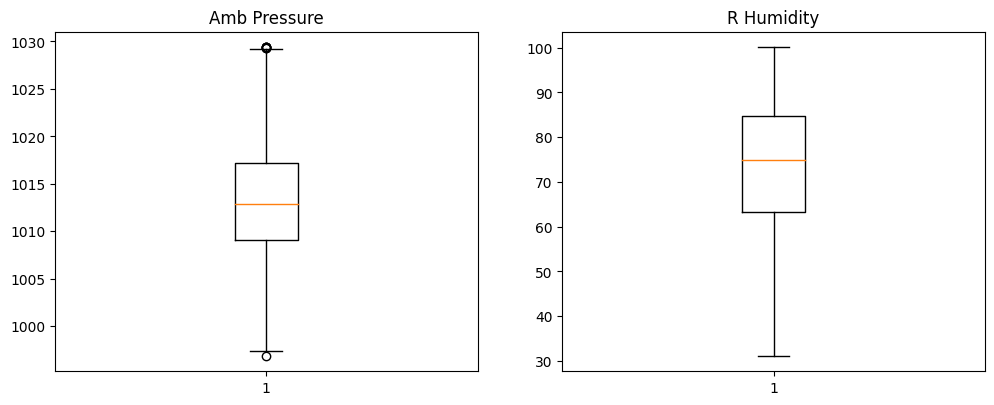

In [17]:
# BoxPlot After Outliers Removal
plt.figure(figsize=(12,15))

plt.subplot(321)
plt.boxplot(df3['amb_pressure'])
plt.title("Amb Pressure")

plt.subplot(322)
plt.boxplot(df3['r_humidity'])
plt.title("R Humidity")

In [18]:
# Descriptive Stats
df3.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9468.000000,9468.00000,9468.000000,9468.000000,9468.000000
mean,19.719883,54.41369,1013.148802,73.322083,454.209298
std,7.427311,12.70141,5.704623,14.551203,17.029285
min,1.810000,25.36000,996.870000,31.150000,420.260000
25%,13.577500,41.74000,1009.090000,63.285000,439.697500
50%,20.500000,52.72000,1012.900000,74.980000,451.210000
75%,25.760000,66.54000,1017.170000,84.840000,468.190000
max,37.110000,81.56000,1029.410000,100.160000,495.760000


In [19]:
# Calculating IQR
IQR = 1017.17 - 1009.09
#printing
print("IQR for amb_pressure is: ",IQR)

#Calculating Lower & Upper Extreme for amb_pressure
LE = 1009.09 - IQR * 1.5
UE = 1017.17 + IQR * 1.5
#printing
print("Lower Extreme of amb_pressure is: ",LE)
print("Upper Extreme of amb_pressure is: ",UE)

IQR for amb_pressure is:  8.079999999999927
Lower Extreme of amb_pressure is:  996.9700000000001
Upper Extreme of amb_pressure is:  1029.29


In [20]:
# Checking Total Outliers for Lower Extreme of amb_pressure
len(df3[df3.amb_pressure<LE])

1

In [21]:
#Removing Outliers of amb_pressure
df4 = df3[~(df3.amb_pressure<LE)]
df4.shape

(9467, 5)

In [22]:
# Checking Total Outliers for Upper Extreme of amb_pressure
len(df4[df4.amb_pressure>UE])

6

In [23]:
#Removing Outliers of amb_pressure
df5 = df4[~(df4.amb_pressure>UE)]
df5.shape

(9461, 5)

Text(0.5, 1.0, 'Amb Pressure')

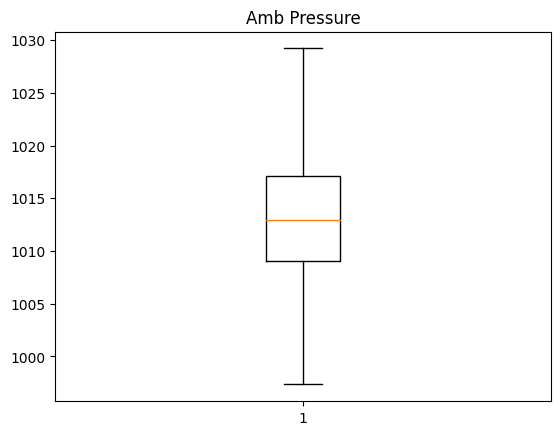

In [24]:
#BoxPlot After Outliers Removal
plt.boxplot(df5['amb_pressure'])
plt.title("Amb Pressure")

In [25]:
# Final Dataset after EDA
df5.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


Text(0.5, 1.0, 'R Humidity')

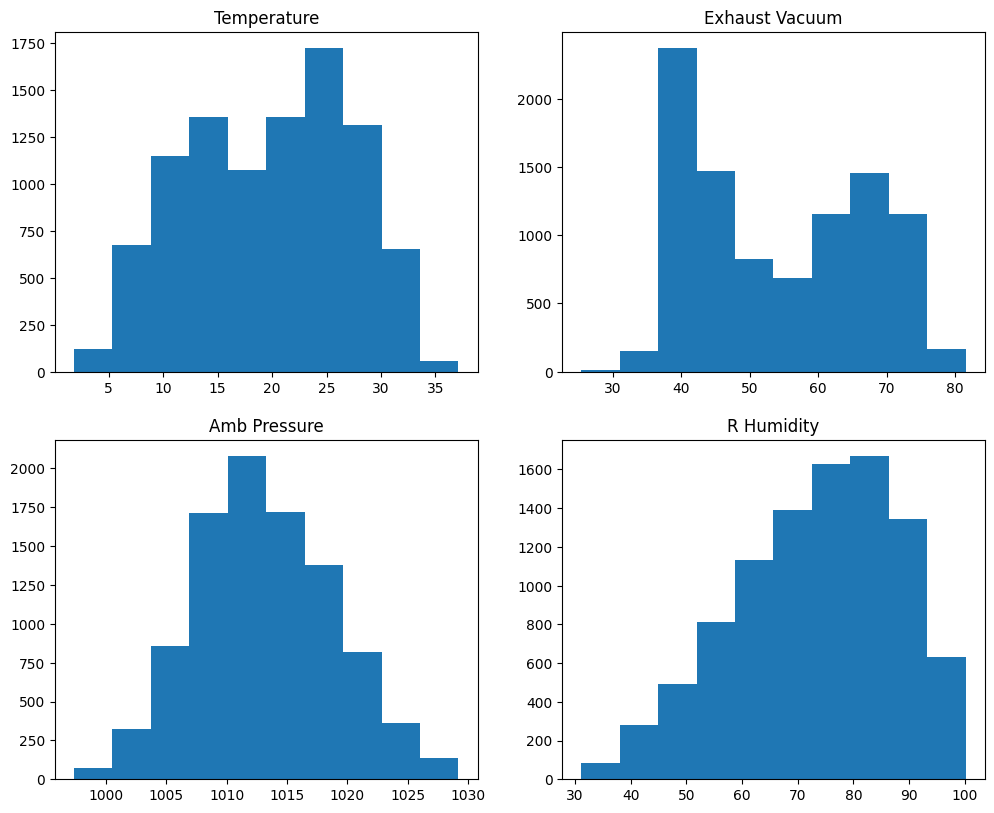

In [26]:
plt.figure(figsize=(12,15))
plt.subplot(321)
plt.hist(df5['temperature'])
plt.title("Temperature")

plt.subplot(322)
plt.hist(df5['exhaust_vacuum'])
plt.title("Exhaust Vacuum")

plt.subplot(323)
plt.hist(df5['amb_pressure'])
plt.title("Amb Pressure")

plt.subplot(324)
plt.hist(df5['r_humidity'])
plt.title("R Humidity")

In [27]:
df5.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.842728,-0.508625,-0.542175,-0.947491
exhaust_vacuum,0.842728,1.000000,-0.415389,-0.310217,-0.868693
amb_pressure,-0.508625,-0.415389,1.000000,0.105210,0.521194
r_humidity,-0.542175,-0.310217,0.105210,1.000000,0.388023
energy_production,-0.947491,-0.868693,0.521194,0.388023,1.000000


In [28]:
#check for VIF 'temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity'
rsq_Tem = smf.ols('temperature~exhaust_vacuum+amb_pressure+r_humidity',data=df5).fit().rsquared
vif_Tem = 1/(1-rsq_Tem)

rsq_ex = smf.ols('exhaust_vacuum~temperature+amb_pressure+r_humidity',data=df5).fit().rsquared
vif_ex = 1/(1-rsq_ex)

rsq_amb = smf.ols('amb_pressure~temperature+exhaust_vacuum+r_humidity',data=df5).fit().rsquared
vif_amb = 1/(1-rsq_amb)

rsq_rh = smf.ols('r_humidity~temperature+exhaust_vacuum+amb_pressure',data=df5).fit().rsquared
vif_rh = 1/(1-rsq_rh)

# Storing vif values in a data frame
d1 = {'Variables':['temperature','exhaust_vacuum','amb_pressure','r_humidity'],'VIF':[vif_Tem,vif_ex,vif_amb,vif_rh]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,temperature,5.906452
1,exhaust_vacuum,3.907032
2,amb_pressure,1.447254
3,r_humidity,1.696703


In [29]:
df5.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

In [30]:
formula='energy_production ~ temperature + exhaust_vacuum + amb_pressure + r_humidity'
model=smf.ols(formula,df5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.049e+04
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:56:16   Log-Likelihood:                -27794.
No. Observations:                9461   AIC:                         5.560e+04
Df Residuals:                    9456   BIC:                         5.563e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        442.0964     10.225     43.236      0.000     422.053     462.140
temperature       -1.9745      0.015   -128.448      0.000      -2.005      -1.944
exhaust_vacuum    -0.2342      0.007    -32.046      0.000      -0.249      -0.220
amb_pressure       0.0745      0.010      7.498      0.000       0.055       0.094
r_humidity        -0.1588      0.004    -37.764      0.000      -0.167      -0.151
==============================================================================
Omnibus:                      891.386   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4077.544
Skew:                          -0.359   Prob(JB):                         0.00
Kurtosis:                       6.135   Cond. No.                     2.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
X=df5.iloc[:,0:4]
y=df5.iloc[:,4]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
model_LR=LinearRegression()
model_LR.fit(X_train,y_train)
model_LR.score(X_test,y_test)*100

92.6873415836897

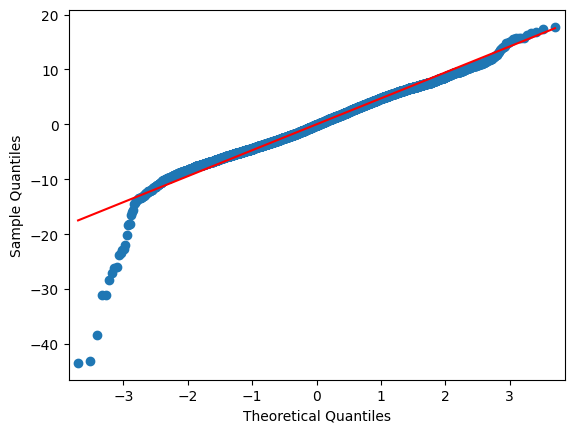

In [35]:
sm.qqplot(model.resid,line='q')
plt.show()

In [36]:
list(np.where(model.resid<-20))
#we have to look into this factor

[array([1321, 1529, 1634, 2121, 2841, 3629, 5421, 5631, 6166, 7637, 7977,
        8008, 8625, 9109, 9459])]

In [37]:
#checking for homoscedacity/heteroscedacity
def standard_val(val):
  return (val-val.mean())/val.std()

In [39]:
from xgboost import XGBRegressor


In [40]:
model_final=XGBRegressor(n_estimators= 250,max_depth=5,learning_rate=0.2)
model_final.fit(X_train,y_train)
model_final.score(X_test,y_test)*100

96.2416536983454

In [41]:
import pickle

In [43]:
filename =open('trained_model.pkl','wb')
pickle.dump(model_final,filename)
filename.close()